In [1]:
print('EDA')

EDA


In [2]:
# Read in the document-term matrix
import pandas as pd

data = pd.read_pickle('dtm.pkl')
data = data.transpose()
data.head()

,beets,broccoli,cabbage,carrots,cauliflower,garlic,kale,onions,peas,seaweed,spinach,sprouts,sweet potatoes,tomato
ability,2,0,2,0,0,0,0,0,0,0,0,1,0,0
able,0,0,2,0,0,0,0,0,0,1,0,1,0,0
abnormally,0,0,0,0,0,1,0,0,0,0,0,0,0,0
absorb,0,0,1,2,0,0,1,0,0,1,0,0,0,0
absorbed,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [3]:
# Find the top 30 words written in the article of vegetables
top_dict = {}
for c in data.columns:
    top = data[c].sort_values(ascending=False).head(30)
    top_dict[c]= list(zip(top.index, top.values))

top_dict

{'beets': [('blood', 20),
  ('beets', 16),
  ('pressure', 13),
  ('juice', 12),
  ('people', 11),
  ('beet', 11),
  ('high', 7),
  ('diabetes', 7),
  ('reduce', 6),
  ('effects', 5),
  ('vegetable', 5),
  ('beetroot', 5),
  ('study', 4),
  ('drinking', 4),
  ('help', 4),
  ('cup', 4),
  ('studies', 4),
  ('significant', 4),
  ('used', 4),
  ('include', 4),
  ('nitrates', 4),
  ('vessels', 4),
  ('diet', 4),
  ('levels', 4),
  ('improve', 3),
  ('alphalipoic', 3),
  ('benefits', 3),
  ('important', 3),
  ('source', 3),
  ('called', 3)],
 'broccoli': [('broccoli', 31),
  ('help', 16),
  ('people', 15),
  ('vitamin', 12),
  ('foods', 10),
  ('fiber', 10),
  ('prevent', 9),
  ('vegetables', 9),
  ('antioxidants', 8),
  ('cruciferous', 8),
  ('cancer', 8),
  ('levels', 7),
  ('blood', 7),
  ('learn', 6),
  ('inflammation', 6),
  ('risk', 6),
  ('content', 6),
  ('diabetes', 5),
  ('according', 5),
  ('daily', 5),
  ('body', 5),
  ('lower', 5),
  ('high', 4),
  ('diet', 4),
  ('type', 4),
  

In [4]:
# Print the top 15 words written in the article of vegetables
for vegetable, top_words in top_dict.items():
    print(vegetable)
    print(', '.join([word for word, count in top_words[0:14]]))
    print('---')

beets
blood, beets, pressure, juice, people, beet, high, diabetes, reduce, effects, vegetable, beetroot, study, drinking
---
broccoli
broccoli, help, people, vitamin, foods, fiber, prevent, vegetables, antioxidants, cruciferous, cancer, levels, blood, learn
---
cabbage
cabbage, cancer, foods, vegetables, diet, risk, cruciferous, disease, red, eating, researchers, shown, health, healthy
---
carrots
carrots, vitamin, help, people, carrot, cancer, foods, fiber, contain, diet, body, blood, risk, according
---
cauliflower
cauliflower, risk, cancer, foods, fiber, vitamin, calcium, vegetables, sulforaphane, help, high, intake, lower, blood
---
garlic
garlic, study, cancer, heart, blood, used, published, journal, risk, oil, ancient, allium, studies, team
---
kale
kale, vitamin, blood, people, fiber, foods, risk, help, antioxidants, body, leaves, potassium, health, high
---
onions
onions, people, cancer, onion, allium, vegetables, risk, include, compounds, good, health, addition, eating, spring

In [5]:
# Look at the most common top words --> add them to the stop word list
from collections import Counter

# Let's first pull out the top 30 words for each vegetables
words = []
for vegetable in data.columns:
    top = [word for (word, count) in top_dict[vegetable]]
    for t in top:
        words.append(t)
        
words

['blood',
 'beets',
 'pressure',
 'juice',
 'people',
 'beet',
 'high',
 'diabetes',
 'reduce',
 'effects',
 'vegetable',
 'beetroot',
 'study',
 'drinking',
 'help',
 'cup',
 'studies',
 'significant',
 'used',
 'include',
 'nitrates',
 'vessels',
 'diet',
 'levels',
 'improve',
 'alphalipoic',
 'benefits',
 'important',
 'source',
 'called',
 'broccoli',
 'help',
 'people',
 'vitamin',
 'foods',
 'fiber',
 'prevent',
 'vegetables',
 'antioxidants',
 'cruciferous',
 'cancer',
 'levels',
 'blood',
 'learn',
 'inflammation',
 'risk',
 'content',
 'diabetes',
 'according',
 'daily',
 'body',
 'lower',
 'high',
 'diet',
 'type',
 'skin',
 'need',
 'sulforaphane',
 'provides',
 'health',
 'cabbage',
 'cancer',
 'foods',
 'vegetables',
 'diet',
 'risk',
 'cruciferous',
 'disease',
 'red',
 'eating',
 'researchers',
 'shown',
 'health',
 'healthy',
 'help',
 'blood',
 'consuming',
 'cooked',
 'compound',
 'radiation',
 'cells',
 'associated',
 'cardiovascular',
 'known',
 'popular',
 'dim',


In [6]:
# Let's aggregate this list and identify the most common words along with how many times they appeared in
Counter(words).most_common()


[('risk', 13),
 ('health', 12),
 ('people', 11),
 ('high', 10),
 ('cancer', 10),
 ('blood', 9),
 ('diet', 9),
 ('help', 8),
 ('vitamin', 8),
 ('foods', 8),
 ('diabetes', 7),
 ('levels', 7),
 ('fiber', 7),
 ('vegetables', 7),
 ('intake', 7),
 ('reduce', 6),
 ('body', 6),
 ('skin', 6),
 ('studies', 5),
 ('benefits', 5),
 ('include', 4),
 ('important', 4),
 ('prevent', 4),
 ('antioxidants', 4),
 ('cruciferous', 4),
 ('type', 4),
 ('provides', 4),
 ('disease', 4),
 ('contains', 4),
 ('contain', 4),
 ('dietary', 4),
 ('compounds', 4),
 ('potassium', 4),
 ('vegetable', 3),
 ('study', 3),
 ('source', 3),
 ('daily', 3),
 ('lower', 3),
 ('sulforaphane', 3),
 ('eating', 3),
 ('researchers', 3),
 ('consuming', 3),
 ('eat', 3),
 ('bone', 3),
 ('heart', 3),
 ('healthful', 3),
 ('pressure', 2),
 ('cup', 2),
 ('used', 2),
 ('alphalipoic', 2),
 ('content', 2),
 ('according', 2),
 ('need', 2),
 ('shown', 2),
 ('healthy', 2),
 ('associated', 2),
 ('cardiovascular', 2),
 ('calcium', 2),
 ('overall', 2),


In [7]:
# If more than half of the vegetables have it as a top word, exclude it from the list
add_stop_words = [word for word, count in Counter(words).most_common() if count > 6]
add_stop_words

['risk',
 'health',
 'people',
 'high',
 'cancer',
 'blood',
 'diet',
 'help',
 'vitamin',
 'foods',
 'diabetes',
 'levels',
 'fiber',
 'vegetables',
 'intake']

In [8]:
# Let's update our document-term matrix with the new list of stop words
from sklearn.feature_extraction import text 
from sklearn.feature_extraction.text import CountVectorizer

# Read in cleaned data
data_clean = pd.read_pickle('data_clean.pkl')

# Add new stop words
stop_words = text.ENGLISH_STOP_WORDS.union(add_stop_words)

# Recreate document-term matrix
cv = CountVectorizer(stop_words=stop_words)
data_cv = cv.fit_transform(data_clean.transcript)
data_stop = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names())
data_stop.index = data_clean.index

# Pickle it for later use
import pickle
pickle.dump(cv, open("cv_stop.pkl", "wb"))
data_stop.to_pickle("dtm_stop.pkl")

In [9]:
# Let's make some word clouds!

from wordcloud import WordCloud


wc = WordCloud(stopwords=stop_words, background_color="white", colormap="Dark2",
               max_font_size=150, random_state=42)

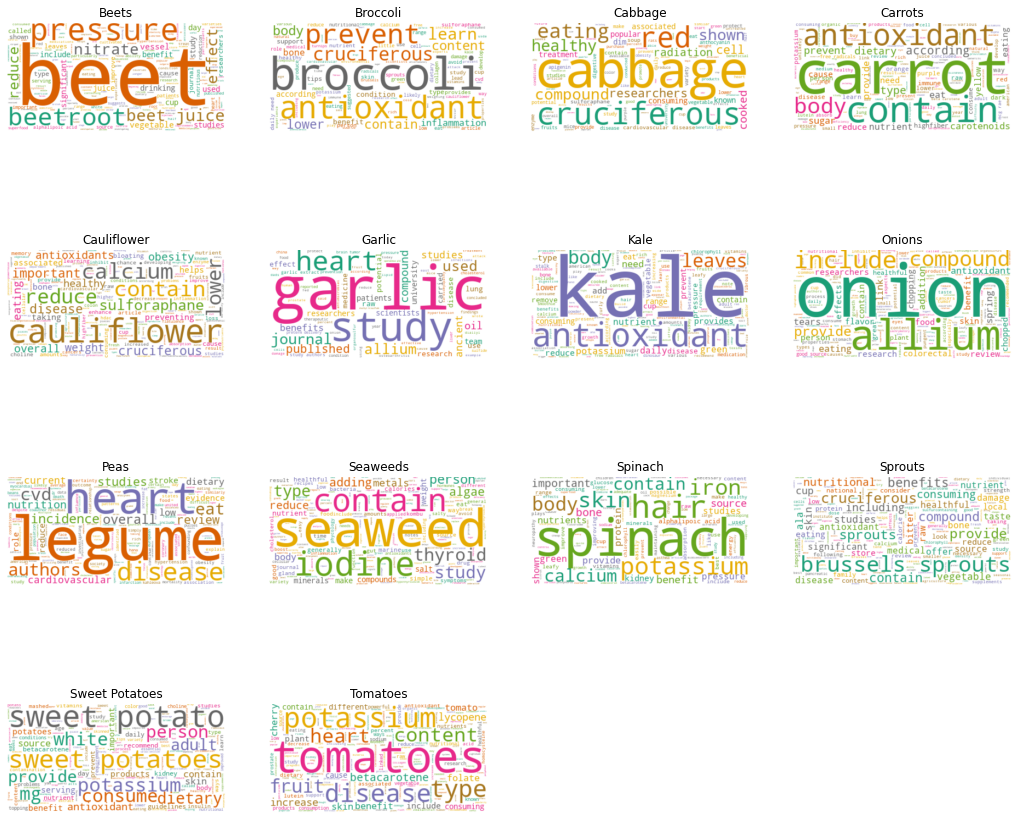

In [16]:
# Reset the output dimensions
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [18, 16]

ranking = ['Beets', 'Broccoli', 'Cabbage', 'Carrots', 'Cauliflower', 'Garlic', 'Kale', 'Onions',
           'Peas', 'Seaweeds', 'Spinach', 'Sprouts', 'Sweet Potatoes', 'Tomatoes']

# Create subplots for each vegetables
for index, vegetable in enumerate(data.columns):
    wc.generate(data_clean.transcript[vegetable])
    
    plt.subplot(4, 4, index+1)
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title(ranking[index])
    
plt.show()

In [11]:
# Find the number of unique words that each vegetable used.

# Identify the non-zero items in the document-term matrix, meaning that the word occurs at least once
unique_list = []
for vegetable in data.columns:
    uniques = data[vegetable].to_numpy().nonzero()[0].size
    unique_list.append(uniques)

# Create a new dataframe that contains this unique word count
data_words = pd.DataFrame(list(zip(ranking, unique_list)), columns=['vegetables', 'unique_words'])
data_unique_sort = data_words.sort_values(by='unique_words')
data_unique_sort

,vegetables,unique_words
8,Peas,274
10,Spinach,274
4,Cauliflower,293
9,Seaweeds,322
7,Onions,339
11,Sprouts,358
1,Broccoli,375
0,Beets,377
12,Sweet Potatoes,388
13,Tomatoes,409


In [12]:
# Listing the rankings
# Find the total number of words that vegetable used
total_list = []
for vegetable in data.columns:
    totals = sum(data[vegetable])
    total_list.append(totals)
    
# Vegetable's ranking
ranking = [6, 3, 8, 7, 14, 10, 2, 11, 4, 13, 1, 12, 5, 9]

# Let's add some columns to our dataframe
data_words['total_words'] = total_list
data_words['ranking'] = ranking


# Sort the dataframe by the rankings of the vegetable 
data_rkg_sort = data_words.sort_values(by='ranking')
data_rkg_sort

,vegetables,unique_words,total_words,ranking
10,Spinach,274,436,1
6,Kale,442,878,2
1,Broccoli,375,710,3
8,Peas,274,442,4
12,Sweet Potatoes,388,714,5
0,Beets,377,617,6
3,Carrots,493,926,7
2,Cabbage,423,680,8
13,Tomatoes,409,739,9
5,Garlic,565,1011,10


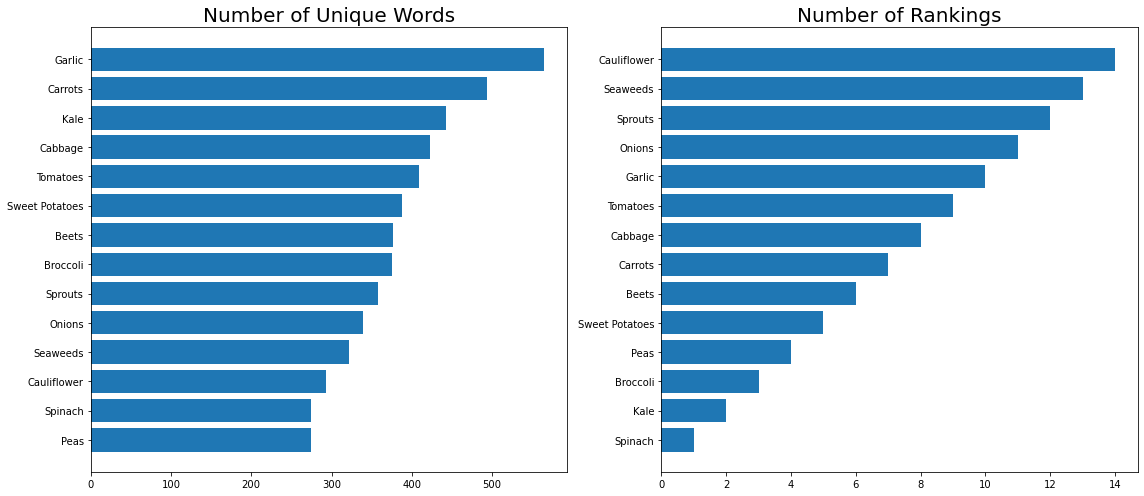

In [13]:
# Let's plot our findings
import numpy as np

y_pos = np.arange(len(data_words))

plt.subplot(1, 2, 1)
plt.barh(y_pos, data_unique_sort.unique_words, align='center')
plt.yticks(y_pos, data_unique_sort.vegetables)
plt.title('Number of Unique Words', fontsize=20)

plt.subplot(1, 2, 2)
plt.barh(y_pos, data_rkg_sort.ranking, align='center')
plt.yticks(y_pos, data_rkg_sort.vegetables)
plt.title('Number of Rankings', fontsize=20)

plt.tight_layout()
plt.show()

In [14]:
print('EDA DONE')
print('BY : BENEDICTO')

EDA DONE
BY : BENEDICTO
